In [6]:
import os
import threading

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys

In [7]:
def svdImageMatrix(om, k):
    U, S, Vt = np.linalg.svd(om)
    cmping = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])    
    return cmping

def compressImage(image, k):
    redChannel = image[..., 0]
    greenChannel = image[..., 1]
    blueChannel = image[..., 2]

    cmpRed = svdImageMatrix(redChannel, k)
    cmpGreen = svdImageMatrix(greenChannel, k)
    cmpBlue = svdImageMatrix(blueChannel, k)

    newImage = np.zeros((image.shape[0], image.shape[1], 3), 'uint8')

    newImage[..., 0] = cmpRed
    newImage[..., 1] = cmpGreen
    newImage[..., 2] = cmpBlue

    return newImage

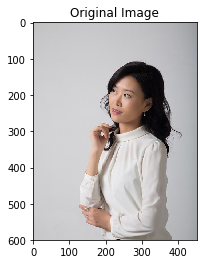

In [8]:
path = 'liye.jpg'
img = mpimg.imread(path)

title = "Original Image"
plt.title(title)
plt.imshow(img)
plt.show()

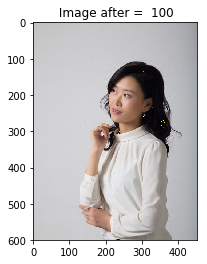

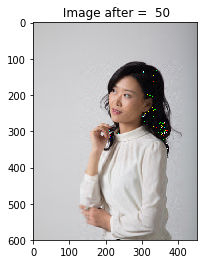

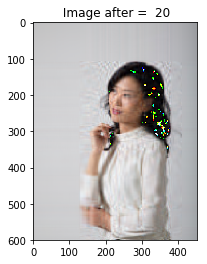

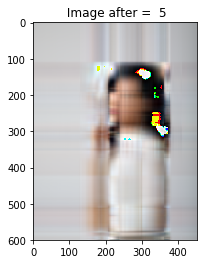

In [10]:
weights = [100, 50, 20, 5]

for k in weights:
    newImg = compressImage(img, k)

    title = " Image after =  %s" %k
    plt.title(title)
    plt.imshow(newImg)
    plt.show()    

    newname = os.path.splitext(path)[0] + '_comp_' + str(k) + '.png'
    mpimg.imsave(newname, newImg)

In [13]:
from sklearn.decomposition import PCA
def pca(om, cn):

    ipca = PCA(cn).fit(om)
    img_c = ipca.transform(om)

    print (img_c.shape)
    print (np.sum(ipca.explained_variance_ratio_))

    temp = ipca.inverse_transform(img_c)
    print (temp.shape)

    return temp

def compressImage(image, k):
    redChannel = image[..., 0]
    greenChannel = image[..., 1]
    blueChannel = image[..., 2]

    cmpRed = pca(redChannel, k)
    cmpGreen = pca(greenChannel, k)
    cmpBlue = pca(blueChannel, k)

    newImage = np.zeros((image.shape[0], image.shape[1], 3), 'uint8')

    newImage[..., 0] = cmpRed
    newImage[..., 1] = cmpGreen
    newImage[..., 2] = cmpBlue

    return newImage

(600, 100)
0.9972720190024332
(600, 451)
(600, 100)
0.9975090555297433
(600, 451)
(600, 100)
0.9976754776756209
(600, 451)


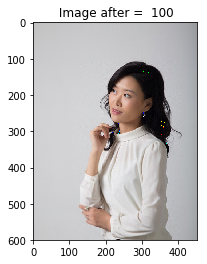

(600, 50)
0.9892753153202076
(600, 451)
(600, 50)
0.9900446663131584
(600, 451)
(600, 50)
0.9905276030572348
(600, 451)


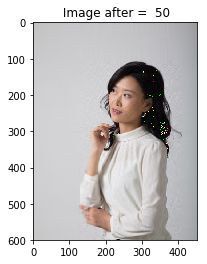

(600, 20)
0.9661257237484724
(600, 451)
(600, 20)
0.9676054751636904
(600, 451)
(600, 20)
0.9683635108305598
(600, 451)


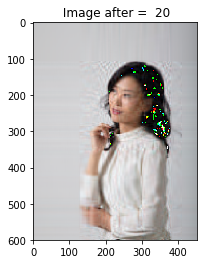

(600, 5)
0.8680248993319958
(600, 451)
(600, 5)
0.8677686701237715
(600, 451)
(600, 5)
0.8665129044955215
(600, 451)


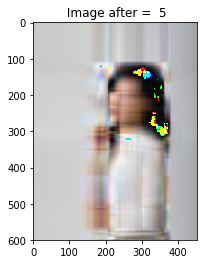

In [14]:
weights = [100, 50, 20, 5]

for k in weights:
    newImg = compressImage(img, k)

    title = " Image after =  %s" %k
    plt.title(title)
    plt.imshow(newImg)
    plt.show()    

    newname = os.path.splitext(path)[0] + '_comp_' + str(k) + '.png'
    mpimg.imsave(newname, newImg)